In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [35]:
# Read the data back from the CSV file
df = pd.read_csv('ad_spend_clicks.csv')

In [36]:
df.head()

,Ad Spend,Clicks
0,553.325369,4069
1,718.037473,15666
2,606.735742,9848
3,549.434351,5295
4,429.418251,2802


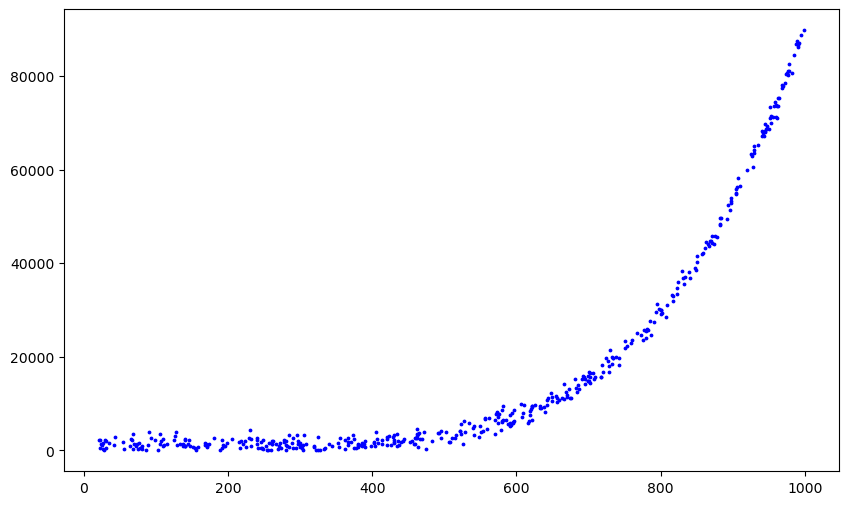

In [37]:
# Plotting
plt.figure(figsize=(10, 6))

# Original data points
plt.scatter(df['Ad Spend'], df['Clicks'], color='blue', label='Data Points',s=3)


In [38]:
X = df[['Ad Spend']].values
X

array([[553.32536889],
       [718.03747271],
       [606.73574231],
       [549.43435117],
       [429.41825135],
       [649.43517194],
       [443.21133915],
       [892.85527077],
       [964.0261329 ],
       [389.60710364],
       [793.8077877 ],
       [533.60597056],
       [572.36411548],
       [926.34067191],
       [ 80.32569762],
       [ 30.01621347],
       [834.29364709],
       [780.37518344],
       [871.31202676],
       [978.83215881],
       [801.16697857],
       [466.86456863],
       [782.72388452],
       [643.52181111],
       [151.91975453],
       [945.22222788],
       [526.62983853],
       [420.51532059],
       [271.91005598],
       [776.49135254],
       [461.58882889],
       [572.74960938],
       [ 28.60190243],
       [621.45914211],
       [615.9747655 ],
       [620.76465691],
       [944.31059773],
       [685.00209611],
       [365.91282157],
       [700.65488397],
       [ 69.62321691],
       [670.09904829],
       [673.93149092],
       [218

In [39]:
y = df['Clicks'].values
y

array([ 4069, 15666,  9848,  5295,  2802, 10509,  1902, 49453, 75281,
         755, 29583,  5887,  7832, 62876,   282,  1920, 37007, 24115,
       45887, 82659, 29963,  2522, 25661, 11284,   632, 68195,  6363,
        2825,  1539, 25768,  4467,  8153,  2115,  9479,  5917,  8884,
       67987, 13996,  2609, 14796,  1324, 11938, 11142,  2070,  1334,
          75,  1885,  7157,  2348, 86796,  1094,   552, 11243,  1308,
        3892,   924,  1554, 10670,   870,  2529, 34685,  1335, 38156,
        3425, 80222,   247, 81149,  7931, 19826,   608,  1219,   569,
        3896,    98,  1047, 15244,  3587,   449,  3998,   148,  8530,
       64289,  2836, 11496,  2356, 18161,  2078,  2248,  5883,   491,
       36824, 15319,  1769, 19854, 75320,  6034,  8588,  7825,  4273,
       71361,  1692, 39055, 14454,  1083, 33141,  1754, 49725,  6425,
       48166, 14251, 16684,  1791, 71292, 12192,  3198,  9734, 11138,
        1365,  9404,  3451,  1343,  3270,  5893,  6109,  4348, 10287,
       11556,  1165,

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Simple linear regression
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predict using simple linear regression
y_pred_simple_fit = simple_model.predict(X_test)

In [53]:
y_pred_simple_fit

array([ -9744.86745601,   6692.65931506,  31888.55073555,  18304.73899912,
          636.30576838,   2152.38585422, -18096.93878668, -10550.58734548,
         9469.77631707, -14361.05878784,  31152.24540482,  29686.61778248,
        13796.16439465,  34345.597689  ,  21490.75388991,  -9558.369078  ,
        28249.73164497, -14759.26397093,  50611.67669657, -14449.41458662,
         9258.85572386, -17471.71009245,  40196.10320071,   4325.92125325,
        21304.18329392,  25044.77936384,  13391.23251847,  31955.97909496,
        37399.34516658,  17887.32810404,  22881.54885543,  13911.62934805,
        28208.9338504 ,  22659.39473936,   1254.73078764, -17968.25079538,
        42529.41166937,  45387.71649124,  23210.89920386,   1601.78105501,
        15972.70402853, -17741.17464279,  10054.10355384,  29582.70602432,
        -9173.0678875 ,  36472.65163435,  39480.95598246,   6733.02073666,
        14255.24868227,  21388.11731675,  12890.74606883,   4398.43148676,
        25077.83901553,  

In [93]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"Test R2: {r2_score(y_test, y_pred_simple_fit)}")

Test R2: 0.4982121298153428


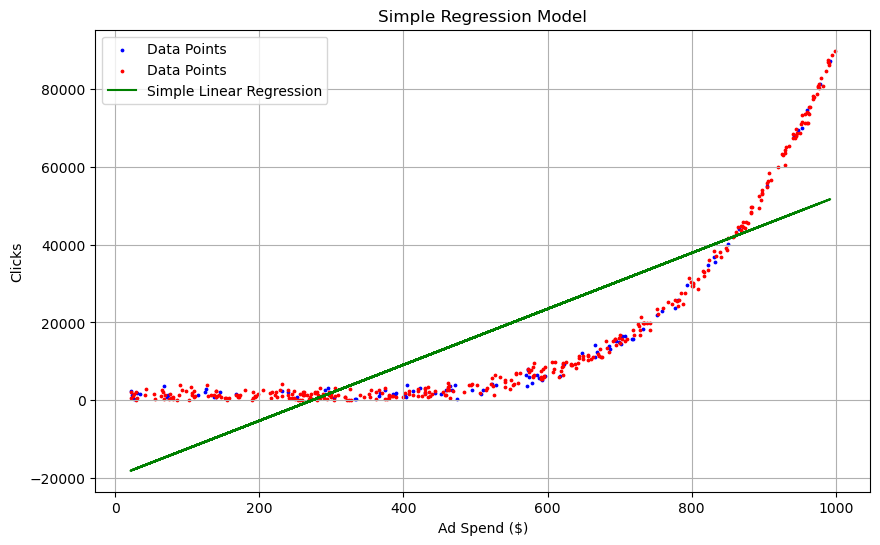

In [59]:
# Plotting
plt.figure(figsize=(10, 6))

# Original data points
plt.scatter(X_test, y_test, color='blue', label='Test Data Points',s=3)
plt.scatter(X_train, y_train, color='red', label='Train Data Points',s=3)


# Simple linear regression line
plt.plot(X_test, y_pred_simple_fit, color='green', label='Simple Linear Regression')


plt.title('Simple Regression Model')
plt.xlabel('Ad Spend ($)')
plt.ylabel('Clicks')
plt.legend()
plt.grid(True)
plt.show()


In [66]:
# Polynomial regression
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
X_poly

array([[1.00000000e+00, 5.53325369e+02, 3.06168964e+05],
       [1.00000000e+00, 7.18037473e+02, 5.15577812e+05],
       [1.00000000e+00, 6.06735742e+02, 3.68128261e+05],
       ...,
       [1.00000000e+00, 4.07696400e+02, 1.66216355e+05],
       [1.00000000e+00, 2.55929330e+02, 6.54998222e+04],
       [1.00000000e+00, 5.10807720e+02, 2.60924527e+05]])

In [67]:
# Split the data into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)


In [68]:
#Polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly,  y_train)

LinearRegression()

In [69]:
y_pred_poly_fit = poly_model.predict(X_test_poly)
y_pred_poly_fit

array([ 2.09521788e+03, -3.73199781e+03,  2.34370785e+04,  3.36094786e+03,
       -3.74873065e+03, -3.98143585e+03,  1.21815528e+04,  2.85898867e+03,
       -2.88006682e+03,  7.07642919e+03,  2.20233028e+04,  1.93202248e+04,
       -4.95204380e+02,  2.84248689e+04,  6.92961426e+03,  1.92479781e+03,
        1.68136862e+04,  7.57484075e+03,  7.19261103e+04,  7.18607711e+03,
       -2.96339821e+03,  1.12602376e+04,  4.19740527e+04, -4.03906207e+03,
        6.70137688e+03,  1.17348807e+04, -7.73066161e+02,  2.35684124e+04,
        3.52031158e+04,  2.94516862e+03,  8.70651492e+03, -4.13905110e+02,
        1.67445924e+04,  8.41375266e+03, -3.86275852e+03,  1.19897236e+04,
        4.80349309e+04,  5.59702056e+04,  9.14679514e+03, -3.91521771e+03,
        1.19169141e+03,  1.16540119e+04, -2.63321617e+03,  1.91341917e+04,
        1.58029618e+03,  3.30783450e+04,  4.01914525e+04, -3.72341768e+03,
       -1.66532558e+02,  6.80375940e+03, -1.10090169e+03, -4.03537962e+03,
        1.17836607e+04,  

In [92]:
print(f"Test R2: {r2_score(y_test, y_pred_poly_fit)}")

Test R2: 0.9298043510934413


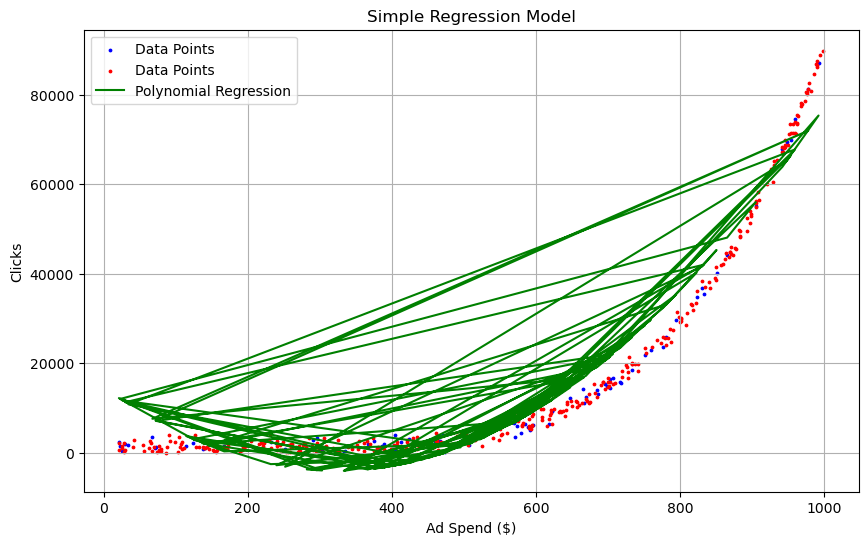

In [89]:
# Plotting
plt.figure(figsize=(10, 6))

# Original data points
plt.scatter(X_test, y_test, color='blue', label='Data Points',s=3)
plt.scatter(X_train, y_train, color='red', label='Data Points',s=3)


# Simple linear regression line
plt.plot(X_test, y_pred_poly_fit, color='green', label='Polynomial Regression')

plt.title('Simple Regression Model')
plt.xlabel('Ad Spend ($)')
plt.ylabel('Clicks')
plt.legend()
plt.grid(True)
plt.show()


#Irregular vs smooth curve presetation of the polynomial curve

X_test points may be sparse and irregular, leading to a less smooth and potentially misleading representation of the regression curve.

X_test contains only the test data points, which may not cover the entire range of 'Ad Spend' values, especially if the dataset is small or unevenly distributed.

Create X_fit instead of X_test for plotting the polynomial regression model provides a more comprehensive visualization of the regression curve across the entire range of the independent variable. 

X_fit is generated using np.linspace, which creates evenly spaced values from the minimum to the maximum of 'Ad Spend'. This ensures that the plot covers the entire range of the independent variable.



In [90]:
"""
np.linspace(start, stop, num):

np.linspace is a function from the NumPy library.
It generates num evenly spaced values between start and stop.
"""

X_fit = np.linspace(df['Ad Spend'].min(), df['Ad Spend'].max(), 10)
X_fit

array([ 21.31318404, 129.92933431, 238.54548459, 347.16163486,
       455.77778513, 564.39393541, 673.01008568, 781.62623595,
       890.24238623, 998.8585365 ])

In [84]:
"""
X_fit:

X_fit is a 1-dimensional array of values. In this context, it likely contains evenly spaced values of ad spend created by the np.linspace function.
X_fit[:, np.newaxis]:

This operation reshapes X_fit from a 1-dimensional array to a 2-dimensional array with a single column.
np.newaxis is used to add a new axis, converting the shape of X_fit from (10,) to (10, 1).
This is necessary because many machine learning algorithms expect a 2-dimensional array as input.
"""

X_fit_poly = poly_features.transform(X_fit[:, np.newaxis])
X_fit_poly

array([[1.00000000e+00, 2.13131840e+01, 4.54251814e+02],
       [1.00000000e+00, 1.29929334e+02, 1.68816319e+04],
       [1.00000000e+00, 2.38545485e+02, 5.69039482e+04],
       [1.00000000e+00, 3.47161635e+02, 1.20521201e+05],
       [1.00000000e+00, 4.55777785e+02, 2.07733389e+05],
       [1.00000000e+00, 5.64393935e+02, 3.18540514e+05],
       [1.00000000e+00, 6.73010086e+02, 4.52942575e+05],
       [1.00000000e+00, 7.81626236e+02, 6.10939573e+05],
       [1.00000000e+00, 8.90242386e+02, 7.92531506e+05],
       [1.00000000e+00, 9.98858537e+02, 9.97718376e+05]])

In [85]:
Y_fit_poly = poly_model.predict(X_fit_poly)
Y_fit_poly

array([12181.55284862,  2610.83107912, -2769.00850052, -3957.96589032,
        -956.04109027,  6236.76589963, 17620.45507937, 33195.02644896,
       52960.4800084 , 76916.81575768])

In [86]:
df_poly_fit = pd.DataFrame({'Ad Spend': X_fit, 'Clicks': Y_fit_poly})
df_poly_fit

,Ad Spend,Clicks
0,21.313184,12181.552849
1,129.929334,2610.831079
2,238.545485,-2769.008501
3,347.161635,-3957.965890
4,455.777785,-956.041090
5,564.393935,6236.765900
6,673.010086,17620.455079
7,781.626236,33195.026449
8,890.242386,52960.480008
9,998.858537,76916.815758


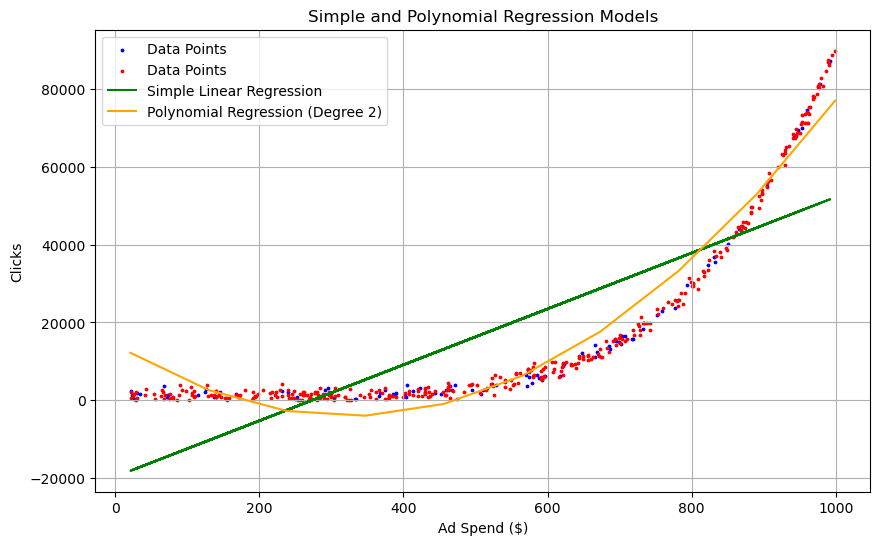

In [97]:
# Plotting
plt.figure(figsize=(10, 6))

# Original data points
plt.scatter(X_test, y_test, color='blue', label='Data Points',s=3)
plt.scatter(X_train, y_train, color='red', label='Data Points',s=3)

# Simple linear regression line
plt.plot(X_test, y_pred_simple_fit, color='green', label='Simple Linear Regression')

# Polynomial regression curve
plt.plot(df_poly_fit['Ad Spend'], df_poly_fit['Clicks'], color='orange', label=f'Polynomial Regression (Degree {degree})')

plt.title('Simple and Polynomial Regression Models')
plt.xlabel('Ad Spend ($)')
plt.ylabel('Clicks')
plt.legend()
plt.grid(True)
plt.show()
